In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


In [19]:
home_data =pd.read_csv("E:\\Data scienec Master class\\notes\\machine learning\\datasets\\Pricing_Tree Machine leraning.csv") 


In [20]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Review The Data

In [21]:
# Print summary statistics in next line
print(home_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [22]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
y = home_data["SalePrice"]

In [24]:
# Create the list of features below
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]


In [25]:
#Validate the model

In [26]:
#split function
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Initialize and fit Decision Tree model
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)



DecisionTreeRegressor(random_state=1)

In [27]:
# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 29,653


Optional part

In [28]:
# Function to get Mean Absolute Error for different max_leaf_nodes

In [29]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [30]:
#######✅ Purpose:
#This function tests different tree sizes (max_leaf_nodes) to see which one gives the lowest prediction error (MAE).


######🟢 Why Use It?
#A Decision Tree can overfit if it has too many leaf nodes.
#By trying different values, you can find the best tree size that balances accuracy and generalization.

In [31]:
# Define candidate leaf nodes and evaluate MAE
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
mae_values = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Choose the best max_leaf_nodes value
best_tree_size = min(mae_values, key=mae_values.get)


In [32]:
######✅ Purpose:
#It tests different tree sizes (5, 25, 50, 100, 250, 500).
#It stores the Mean Absolute Error (MAE) for each size.
#It selects the best tree size (i.e., the one with the lowest MAE).


######🟢 Why Use It?
#Helps prevent overfitting or underfitting by selecting an optimal tree size.

In [33]:
# Train final model with best tree size
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(train_X, train_y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

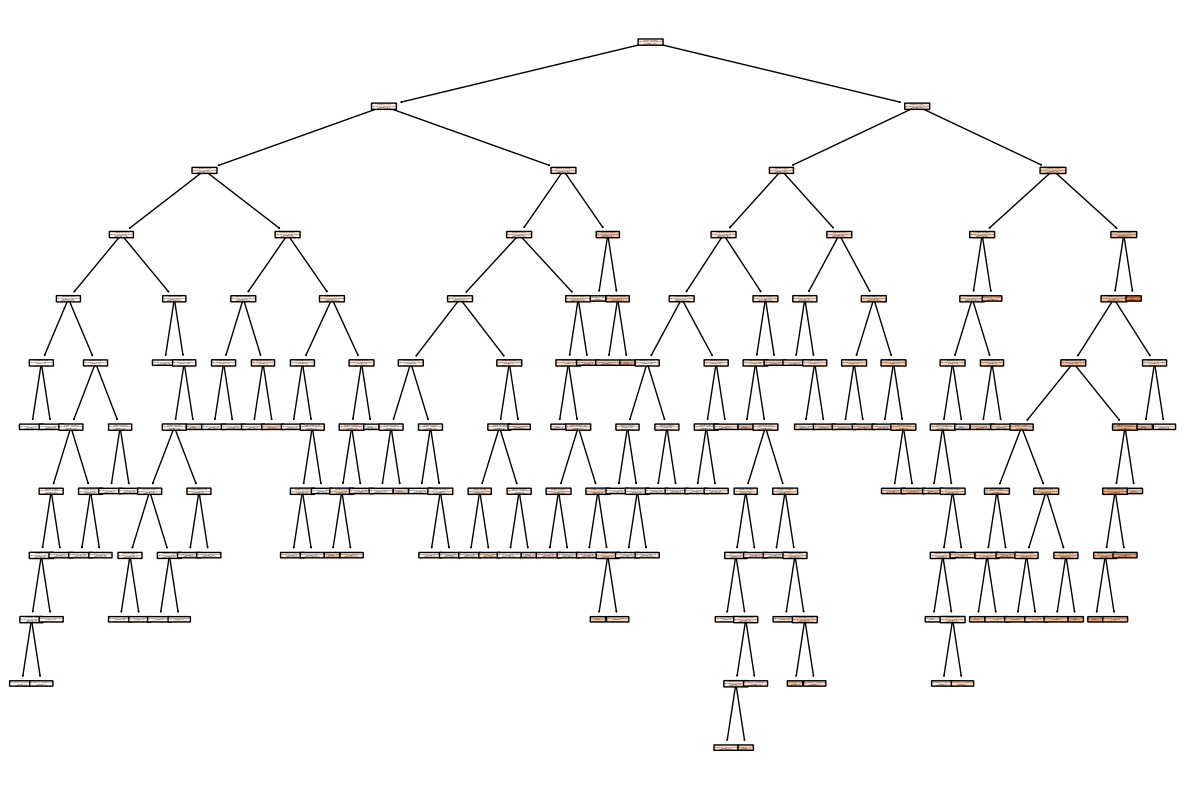

In [17]:
# Visualize Decision Tree 
plt.figure(figsize=(15, 10))
plot_tree(final_model, feature_names=feature_names, filled=True, rounded=True)
plt.show()